In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import additionalplot_solution_1, additionalplot_solution_2

We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [3]:
# YOUR CODE HERE
car_count = fuel_econ.groupby(['make']).size()
car_count = car_count.reset_index(name = "freq")
car = car_count[(car_count['freq'] >= 80)]
car_order = car['make']
car_order

3              Audi
4               BMW
7          Cadillac
8         Chevrolet
10            Dodge
13             Ford
15            Honda
16          Hyundai
17         Infiniti
18           Jaguar
20              Kia
21            Lexus
24             MINI
26            Mazda
27    Mercedes-Benz
30          Porsche
36           Toyota
37       Volkswagen
Name: make, dtype: object

([<matplotlib.axis.YTick at 0x7f38ee049ef0>,
 <a list of 5 Text yticklabel objects>)

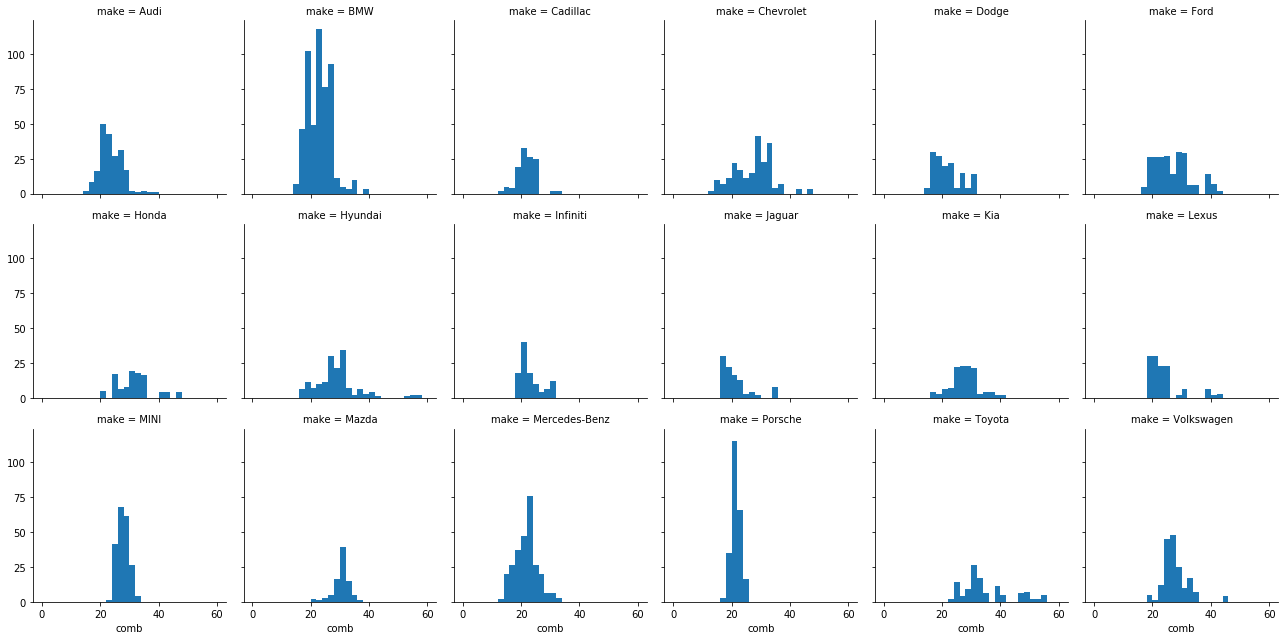

In [4]:
bin_edges = np.arange(0,62,2)
bin_1 = np.arange(0,125,25)
ax1 = sb.FacetGrid(data = fuel_econ,col = 'make',col_wrap = 6,col_order = car_order,)
ax1.map(plt.hist,'comb',bins = bin_edges)
plt.yticks(bin_1)

Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.


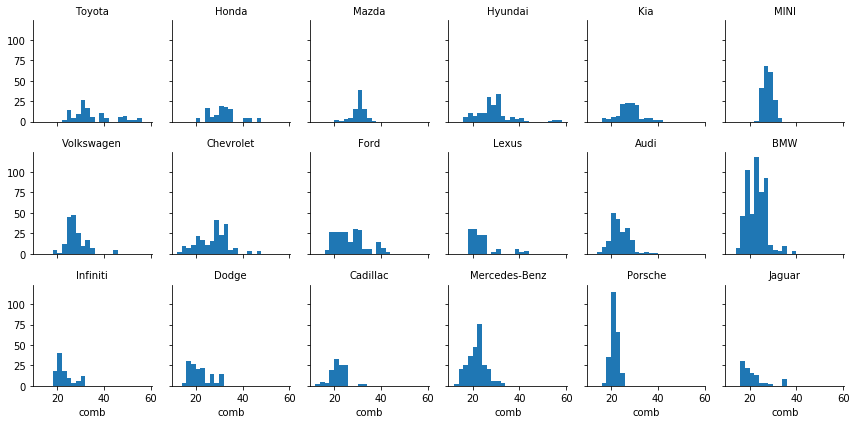

In [5]:
# run this cell to check your work against ours
additionalplot_solution_1()

### **Task 2**: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

In [6]:
# YOUR CODE HERE
avg_fuel = fuel_econ.groupby(['make']).size()
avg_fuel = avg_fuel.reset_index(name = 'count')
avg_fuel = avg_fuel[avg_fuel['count']>=80]
sum_fuel = fuel_econ.groupby(['make']).sum()
car = avg_fuel['make']
sum_fuel = sum_fuel.reset_index()
list1 = car.index
list2 = []
for i in range(len(list1)):
   dat = sum_fuel['comb'][list1[i]]
   list2.append(dat)
list2/=avg_fuel['count']
list2

3     23.639240
4     23.004798
7     21.773203
8     27.224809
10    21.812190
13    26.796018
15    31.588841
16    28.793620
17    23.002081
18    21.429054
20    27.843018
21    23.870986
24    27.807288
26    30.397474
27    21.765718
30    21.504786
36    35.184424
37    27.769875
Name: count, dtype: float64

In [7]:
sum_fuel

,make,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,Acura,1643286,92703,238,137.9,0,4357,1039.6516,1340.1437,1433.9988,2068.1009,1181.0327,16229,282,282
1,Alfa Romeo,233265,12105,28,13.8,0,600,126.2478,160.5604,175.2598,250.5988,144.4080,2258,31,31
2,Aston Martin,545382,30235,180,88.6,774,415,204.1429,250.9224,301.7495,419.9426,238.8225,8355,40,40
3,Audi,7202915,405122,1108,553.1,5182,9806,4105.8119,5156.0610,5907.2858,8143.1543,4751.4873,77320,1092,1086
4,BMW,18803758,1054103,3124,1612.8,18536,28906,10388.1472,13157.1498,14983.4759,21405.0922,12031.5093,206525,2731,2727
5,Bentley,1607820,90692,456,247.6,3464,710,559.7621,687.0909,940.6687,1243.7071,684.4173,26504,105,105
6,Buick,2332696,132996,298,166.1,246,5839,1335.2050,1698.7740,1964.8098,2820.1115,1557.7873,25050,365,365
7,Cadillac,4254149,237839,646,382.7,2879,11090,2223.7151,2836.6579,3178.8919,4514.2214,2569.2380,48225,580,582
8,Chevrolet,7611500,427281,1036,551.1,4185,14212,5078.6669,6589.0782,6999.6663,10162.7106,5771.6596,72919,1354,1347
9,Chrysler,2066021,116876,344,216.8,352,5618,1079.4606,1356.9982,1665.3109,2374.7654,1281.7653,23585,292,292


Text(0.5,0,'Average Combined Fuel Efficiency')

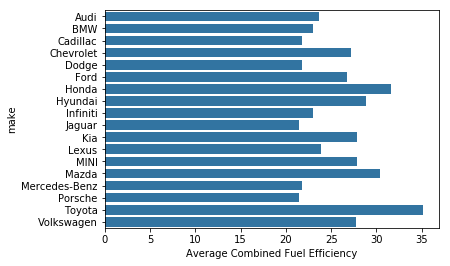

In [8]:
base_color = sb.color_palette()[0]
sb.barplot(y = car,x = list2,color = base_color,ci = "sd")
plt.xlabel("Average Combined Fuel Efficiency")

Seaborn's barplot function makes short work of this exercise. Since there are a lot of 'make' levels, I've made it a horizontal bar chart. In addition, I've set the error bars to represent the standard deviation of the car mileages.


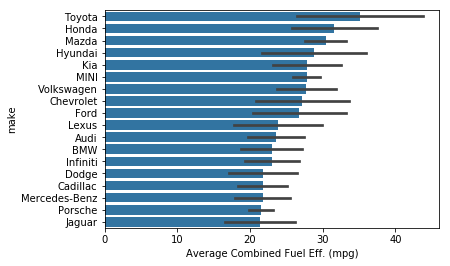

In [9]:
# run this cell to check your work against ours
additionalplot_solution_2()